# Customer Risk Prediction using Synthetic Data

1. Import Libraries & Load Data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building (Baseline → Advanced)
5. Hyperparameter Tuning
6. Model Comparison & Conclusion

## 1. Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("Chandu_Data_Science/projects/data/synthetic_imbalanced_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'projects/data/synthetic_imbalanced_dataset.csv'

!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(output_file="output.html")

## 2. Exploratory Data Analysis (EDA)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.sample(5)

In [ ]:
df.describe()

In [ ]:
# check the count of null values & sort (desc)
df.isnull().sum().sort_values(ascending=False)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

In [ ]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower_limit, upper_limit)
    return df

In [ ]:
# Apply IQR method to handle outliers
outlier_cols = [
    'income',
    'savings',
    'monthly_expenses',
    'credit_score',
    'loan_amount',
    'debt_to_income'
]

for col in outlier_cols:
    treat_outliers_iqr(df, col)

df['credit_score'] = df['credit_score'].clip(350, 850)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
print(num_cols)
print('---')
print(cat_cols)

In [ ]:
org_credit_score=df['credit_score']
org_monthly_expenses=df['monthly_expenses']
org_income=df['income']
org_savings=df['savings']

In [ ]:
cols_to_impute = ['credit_score', 'monthly_expenses', 'income', 'savings']

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [ ]:
df[outlier_cols].describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_credit_score(original, imputed, bins=30):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(original, kde=True, bins=bins, ax=ax[0])
    ax[0].set_title("Original")

    sns.histplot(imputed, kde=True, bins=bins, ax=ax[1])
    ax[1].set_title("Imputed")

    plt.tight_layout()
    plt.show()

In [ ]:
plot_credit_score(org_credit_score, df['credit_score'])

In [ ]:
plot_credit_score(org_monthly_expenses, df['monthly_expenses'])

In [ ]:
plot_credit_score(org_income, df['income'])

In [ ]:
plot_credit_score(org_savings, df['savings'])

In [ ]:
plot_credit_score(org_savings, df['loan_amount'])

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
for col in cat_cols:
    print(col, df[col].unique())

In [ ]:
df['education'].value_counts()

In [ ]:
df['education'] = df['education'].replace('Bachlors','Bachelors')

In [ ]:
df['education'].value_counts()

In [ ]:
cat_cols = ['education', 'home_ownership', 'marital_status', 'region']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df.sample(5)

In [ ]:
df.drop(columns=['customer_id'], inplace=True)

In [ ]:
# 1. Family Financial Burden
df['income_per_dep'] = df['income'] / (df['num_dependents'] + 1)

df['signup_date'] = pd.to_datetime(df['signup_date'])

df['account_age_days'] = (pd.Timestamp('today') - df['signup_date']).dt.days

df.drop(columns=['signup_date'], inplace=True)

# df['account_age_days'] = scaler.fit_transform(df[['account_age_days']])

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop('target_default_risk', axis=1).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df['target_default_risk'] = df['target_default_risk'].astype(int)

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.shape
df.isnull().sum().sum()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target_default_risk', axis=1)
y = df['target_default_risk']

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## lr

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [38]:
y_predict= lr.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy= accuracy_score(y_test, y_predict)
cla= classification_report(y_test, y_predict)
cm_lr= confusion_matrix(y_test, y_predict)
print(accuracy)
print(cla)

0.938
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       974
           1       0.96      0.92      0.94      1026

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



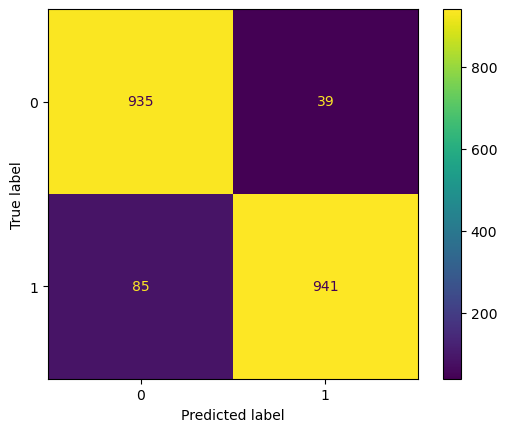

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
# Remove grid lines
plt.grid(False)

## dtc

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_predict_dt= dt_model.predict(x_test)

In [43]:
from sklearn.metrics import classification_report, accuracy_score
accuracy= accuracy_score(y_test, y_predict_dt)
cla= classification_report(y_test, y_predict_dt)

print(accuracy)
print(cla)

0.9245
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       974
           1       0.93      0.92      0.93      1026

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



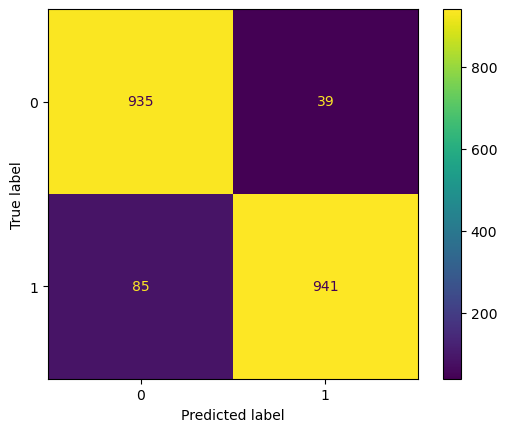

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_dt= confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm_dt).plot()
plt.grid(False)

## svm

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [46]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selector = RFE(
    estimator=LogisticRegression(max_iter=3000),
    n_features_to_select=25
)

X_train_rfe = selector.fit_transform(x_train, y_train)
X_test_rfe = selector.transform(x_test)

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced'
)

param_grid = {
    'C': [5, 10, 20, 30, 50],
    'gamma': [0.005, 0.01, 0.03, 0.05, 0.1]
}

grid = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(x_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid={'C': [5, 10, 20, 30, 50],
                         'gamma': [0.005, 0.01, 0.03, 0.05, 0.1]},
             scoring='accuracy', verbose=2)

In [53]:
svm_rfe = SVC(
    kernel='rbf',
    C=grid.best_params_['C'],
    gamma=grid.best_params_['gamma'],
    class_weight='balanced',
    probability=True
)

svm_rfe.fit(X_trai, y_train)

SVC(C=5, class_weight='balanced', gamma=0.005, probability=True)

In [54]:
y_pred = svm_rfe.predict(X_test_rfe)
x_pred = svm_rfe.predict(X_train_rfe)

In [55]:
from sklearn.metrics import classification_report, accuracy_score
accuracy= accuracy_score(y_test, y_pred)
cla_test= classification_report(y_test, y_pred)
cla_train= classification_report(y_train, x_pred)
print(accuracy)
print(cla_test)
print(cla_train)

0.9425
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       974
           1       0.97      0.92      0.94      1026

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3894
           1       0.97      0.92      0.94      4106

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000



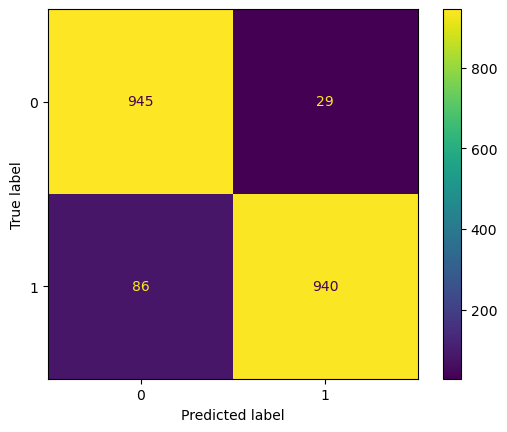

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_svm).plot()
plt.grid(False)

In [52]:
selected_features = x_train.columns[selector.support_]
print(selected_features)

Index(['age', 'income', 'savings', 'num_dependents', 'credit_score',
       'loan_amount', 'employment_years', 'recent_default', 'has_credit_card',
       'signup_dayofweek', 'debt_to_income', 'sin_age', 'education_Other',
       'education_PhD', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed', 'region_North',
       'region_South', 'region_West', 'income_per_dep', 'account_age_days'],
      dtype='object')


## rfc

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [91]:
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [None, 12, 18, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.3, 0.5]
}

In [92]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [93]:
rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [71]:
print("Best CV accuracy:", grid.best_score_)
print("Best parameters:", grid.best_params_)

Best CV accuracy: 0.9498749999999999
Best parameters: {'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [74]:
best_rfc = grid.best_estimator_

test_acc = best_rfc.score(X_test_rfe, y_test)
print("Test accuracy:", test_acc)

Test accuracy: 0.955


In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(class_weight='balanced', 
                           max_depth=18, 
                           max_features=0.5,
                           min_samples_leaf=2,
                           min_samples_split=5,
                           n_estimators=500,
                           n_jobs=-1,
                           random_state=42
)

In [85]:
rfc.fit(X_train_rfe,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=18, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, n_jobs=1, random_state=42)

In [86]:
y_predict= rfc.predict(X_test_rfe)

In [87]:
x_predict= rfc.predict(X_train_rfe)

In [88]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_test= accuracy_score(y_test, y_predict)
cla_test= classification_report(y_test, y_predict)

accuracy_train= accuracy_score(y_train, x_predict)
cla_train= classification_report(y_train, x_predict)

print(accuracy_test)
print(accuracy_train)
print(cla_test)
print(cla_train)

0.9535
0.9835
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       974
           1       0.96      0.95      0.95      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3894
           1       0.98      0.98      0.98      4106

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



In [70]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')
print(cv.mean(), cv.std())

0.9436250000000002 0.0032451887464368056


In [ ]:
pip install xgboost

In [44]:
import xgboost as xgb
model= xgb.XGBClassifier()

In [46]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [47]:
y_predict_xg= model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, accuracy_score
accuracy= accuracy_score(y_test, y_predict_xg)
cla= classification_report(y_test, y_predict_xg)
print(accuracy)
print(cla)

0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       974
           1       0.96      0.96      0.96      1026

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

